# Ford Go Bike Analysis 


Ford GoBike data ANalysis for the month of February 2019. Ford GoBike is a bike-sharing system in the San Francisco Bay Area, 

- This is a eco-friendly mode of transportation for commuters and residents alike. 

- With this will try to Understanding the patterns and trends within the dataset can offer valuable insights into user behavior, system performance, and areas for potential improvement.
- In this analysis, we aim to explore various aspects of the data, including trip duration, user demographics, popular routes, and peak usage times, to gain a comprehensive understanding of the bike-sharing system's dynamics during February 2019.

In [1]:

# importing the libraries that are required 

import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [3]:
df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')

df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Data Preprocessing

- This the processof trying to prepare data for analysis of Modeling

    - Data Cleaning
    - Data Transformation
    - Feature Engineering
    - Data Reduction
    - Normalixing and Standardization
    - Handing Categorical data
    - Data Spliting

In [5]:
df_ford.shape

(183412, 16)

We have a total of :

- 18314 rows and 
- 16 columns in thi data.

In [6]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

    - Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

# 1.1 Data Cleanig 

- this a step to undertake aimed at  ensuring  that data is accurate, complte and consistent for analysis or modeling
    
    - Handling missing values 
        - Identification
        - Imputation( mean,median, interpolation, ml-imputation)
        - Deletion 
    - Dealing with duplicates 
        - Identification
        - Removal 
    - Correcting Errors 
        - indtification
        - Correction
    - Handling Outlires
        - Indentification
        - Treatment 
    - Standardzing data
        - convesrion
        - Standardization

- Lets check the missing values in our data 

In [7]:
df_ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

      -We have notice we have NAN values in our data 

In [8]:
# Checking if there are duplicate values 

df_ford.duplicated().sum()

0

In [9]:
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


What is/are the main feature(s) of interest in your dataset?¶
I'm most interested in figuring out how trip duration is dependent on other specifications from the dataset.

Analyze the bike share data. Using Python, analyze the bike share data to identify patterns and trends in usage. This may include calculating metrics such as the most popular stations, the least popular stations, the average number of rides per station, or any other insights you find interesting.

In [11]:
start_stations = df_ford.groupby(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']).size().reset_index(name='num_rides')

start_stations

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,num_rides
0,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2760
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,610
2,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2327
3,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2082
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,827
...,...,...,...,...,...
324,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,359
325,386.0,24th St at Bartlett St,37.752105,-122.419724,464
326,388.0,Backesto Park (Jackson St at 13th St),37.352887,-121.886050,17
327,389.0,Taylor St at 9th St,37.353062,-121.891937,13


Feature Engeering

/tmp/ipykernel_23175/2287274021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


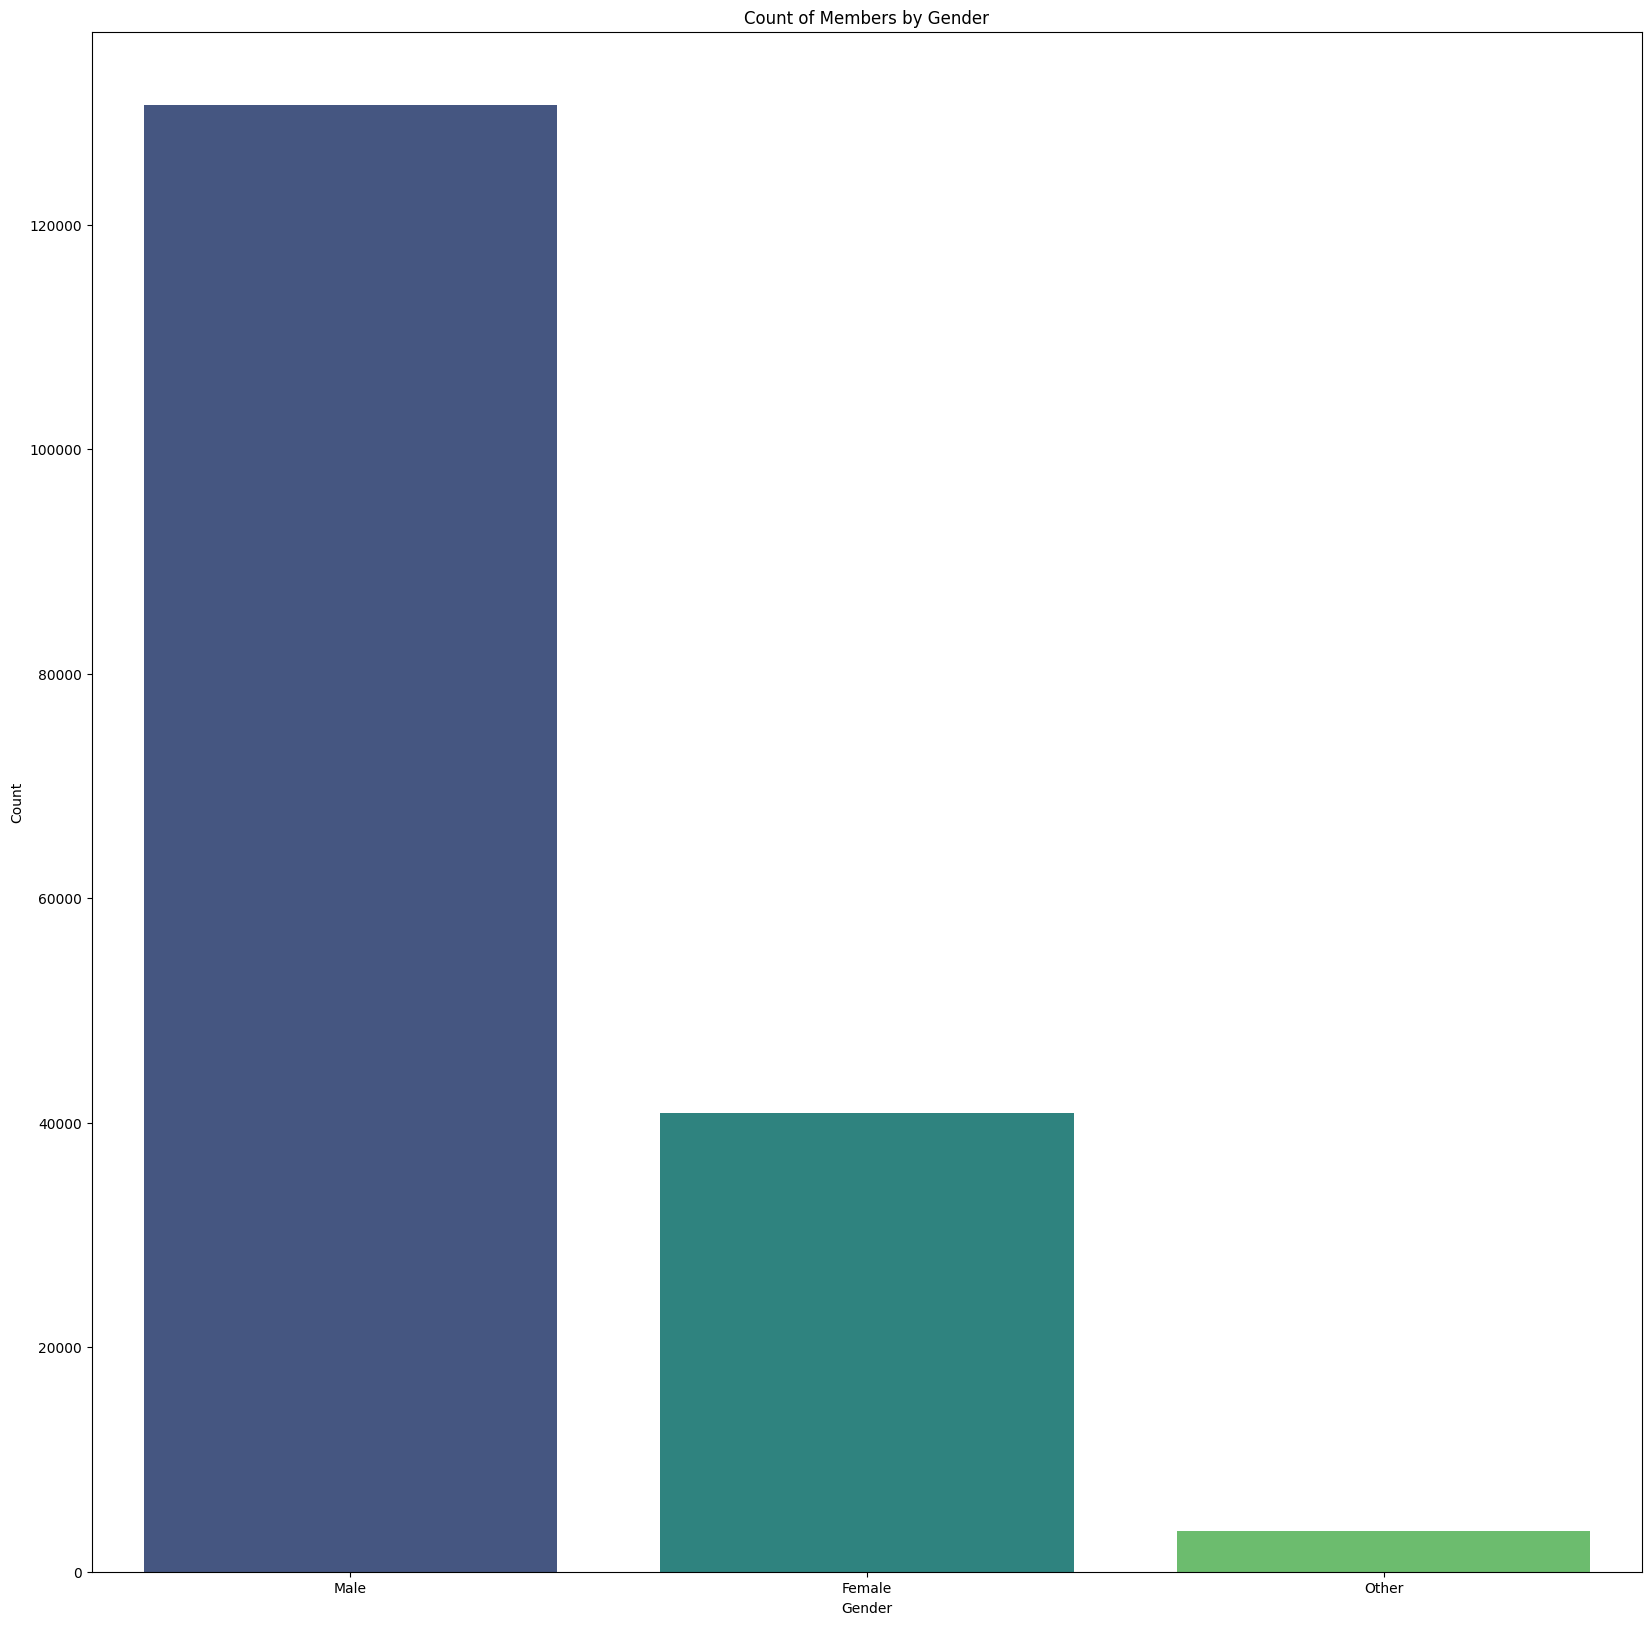

In [20]:
plt.figure(figsize=(20, 20))
gender_counts = df_ford['member_gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Count of Members by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

In [21]:
# assigning proper data type to time
df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])

In [22]:
df_ford['day_of_week'] = pd.DatetimeIndex(df_ford['start_time']).strftime('%A')

df_ford['start_hour'] = df_ford['start_time'].apply(lambda time: time.hour)

df_ford['time_of_day'] = 'Morning'

df_ford['time_of_day'][(df_ford['start_hour']>= 12) & (df_ford['start_hour'] <= 17)]= 'Afternoon'
df_ford['time_of_day'][(df_ford['start_hour'] >= 18) & (df_ford['start_hour'] <= 23)] = 'Night'
display(df_ford[['day_of_week','start_hour','time_of_day']])


/tmp/ipykernel_23175/1319959744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ford['time_of_day'][(df_ford['start_hour']>= 12) & (df_ford['start_hour'] <= 17)]= 'Afternoon'
/tmp/ipykernel_23175/1319959744.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ford['time_of_day'][(df_ford['start_hour'] >= 18) & (df_ford['start_hour'] <= 23)] = 'Night'


,day_of_week,start_hour,time_of_day
0,Thursday,17,Afternoon
1,Thursday,18,Night
2,Thursday,12,Afternoon
3,Thursday,17,Afternoon
4,Thursday,23,Night
...,...,...,...
183407,Friday,0,Morning
183408,Friday,0,Morning
183409,Friday,0,Morning
183410,Friday,0,Morning


In [23]:
df_ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,Afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,Night
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,Friday,0,Morning
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,Friday,0,Morning
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,Friday,0,Morning
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,Friday,0,Morning


# Univirate Exploration

- Day of the week
- time of the day
- User per type
- duration sec

day_of_week
Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: count, dtype: int64

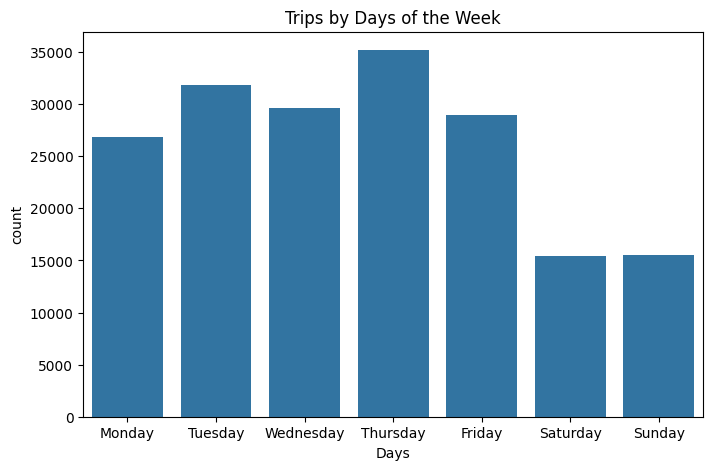

In [25]:
# Get the count of trips made in each day of the week
display(df_ford['day_of_week'].value_counts().sort_values(ascending=False))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plot distribution of day of week
plt.figure(figsize=[8, 5])

# base_color = sns.color_palette()[0]
sns.countplot(data = df_ford, x = 'day_of_week', order=weekday)
plt.title('Trips by Days of the Week')
plt.xlabel('Days')
plt.show()

The percentage count of trips made in terms of times of the day(%)
time_of_day
Afternoon    38.51
Morning      38.42
Night        23.07
Name: count, dtype: float64


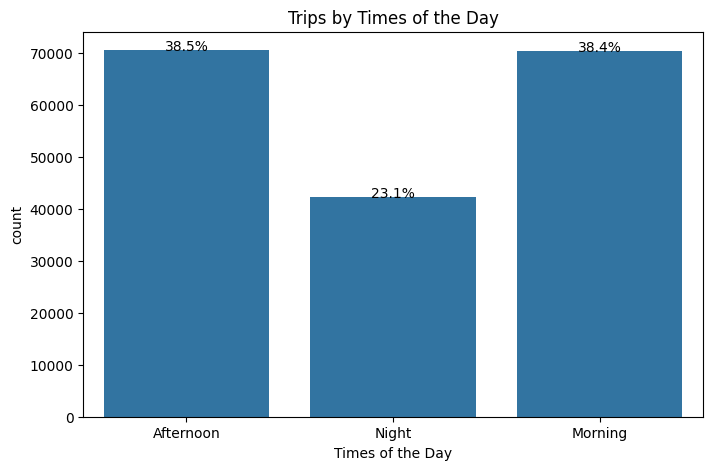

In [27]:
# Get the percentage count of trips made in terms of times of the day
time_of_day_count = (df_ford['time_of_day'].value_counts()/df_ford['time_of_day'].count())*100
print("The percentage count of trips made in terms of times of the day(%)")
print(time_of_day_count.round(2).sort_values(ascending=False))

# plot distribution of day of week
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = df_ford, x = 'time_of_day', color = base_color)
n_points = df_ford.shape[0]
user_counts = df_ford['time_of_day'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title('Trips by Times of the Day')
plt.xlabel('Times of the Day')
plt.show()

In [12]:
start_stations.columns = ['station_id', 'station_name', 'latitude', 'longitude', 'num_rides']


In [13]:
#Analyze the bike share data:
most_popular_station = start_stations.loc[start_stations['num_rides'].idxmax()]
least_popular_station = start_stations.loc[start_stations['num_rides'].idxmin()]
average_rides_per_station = start_stations['num_rides'].mean()

print("Most popular station:", most_popular_station['station_name'], "with", most_popular_station['num_rides'], "rides")
print("Least popular station:", least_popular_station['station_name'], "with", least_popular_station['num_rides'], "rides")
print("Average number of rides per station:", average_rides_per_station)

Most popular station: Market St at 10th St with 3904 rides
Least popular station: 16th St Depot with 2 rides
Average number of rides per station: 556.8844984802431


In [14]:
import folium

map_center = [37.77, -122.42]  # San Francisco, CA
bike_map = folium.Map(location=map_center, zoom_start=12)

# Plot the bike share station data on the map:

def get_marker_color(num_rides):
    if num_rides < 1000:
        return 'green'
    elif num_rides < 5000:
        return 'orange'
    else:
        return 'red'

# Iterate through each row in the start_stations DataFrame
for _, row in start_stations.iterrows():
    
    # Get the appropriate marker color based on the number of rides for the current station
    marker_color = get_marker_color(row['num_rides'])
    
    # Create a folium Marker object with the station's latitude and longitude coordinates
    marker = folium.Marker(
        location=[row['latitude'], row['longitude']],  # Marker location
        icon=folium.Icon(color=marker_color),  # Custom marker color based on the number of rides
        # Set the popup content to display the station name and number of rides
        popup=f"Station: {row['station_name']}<br>Rides: {row['num_rides']}"
    )
    
    # Add the marker to the bike_map
    marker.add_to(bike_map)


# Save the folium map as an HTML file
bike_map.save('bike_map.html')

In [15]:
bike_map